# Model `Asso`

An example of prediction task using `Asso` with k-fold `CrossValidation` and `RatioSplit` on `MovieLensData`.

In [1]:
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.append('../')

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


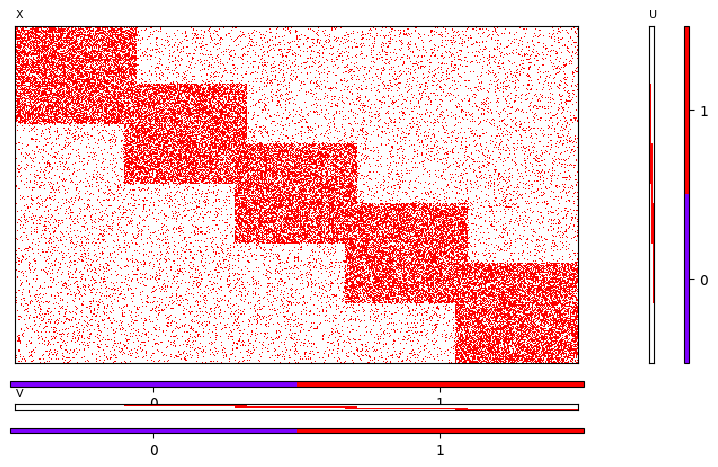

<Figure size 640x480 with 0 Axes>

In [2]:
from PyBMF.generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.4, 0.1, 0.4, 0.1])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)
# tau = 0.3
data.show_matrix(scaling=0.5)

[I] settings.ini found.
d:\Dropbox\PyBMF\examples\settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


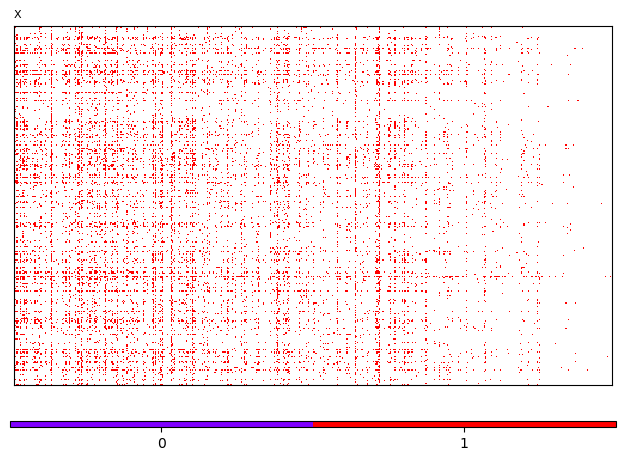

<Figure size 640x480 with 0 Axes>

In [3]:
from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

## 1. `Asso` with `CrossValidation`

In [4]:
# from datasets import CrossValidation

# n_folds = 3

# cv = CrossValidation(X=data.X, test_size=0.2, n_folds=n_folds, seed=1997)
# cv.negative_sample(
#     train_val_size=cv.pos_train_val_size, 
#     test_size=cv.pos_test_size, 
#     seed=2023, type='popularity')

In [5]:
# from models import Asso

# k = 5
# tau = 0.15
# w = 0.2

# for fold in range(n_folds):
#     # get current fold
#     cv.get_fold(current_fold=fold)
#     X_train, X_val, X_test = cv.X_train, cv.X_val, cv.X_test

#     model = Asso(k=k, tau=tau, w=w)
#     model.fit(X_train=X_train, X_val=X_val, task='prediction', verbose=False, display=False)

## 2. `Asso` with `RatioSplit`

In [6]:
from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1721800980
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1721800980


[I] tau          : 0.25
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.5
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.


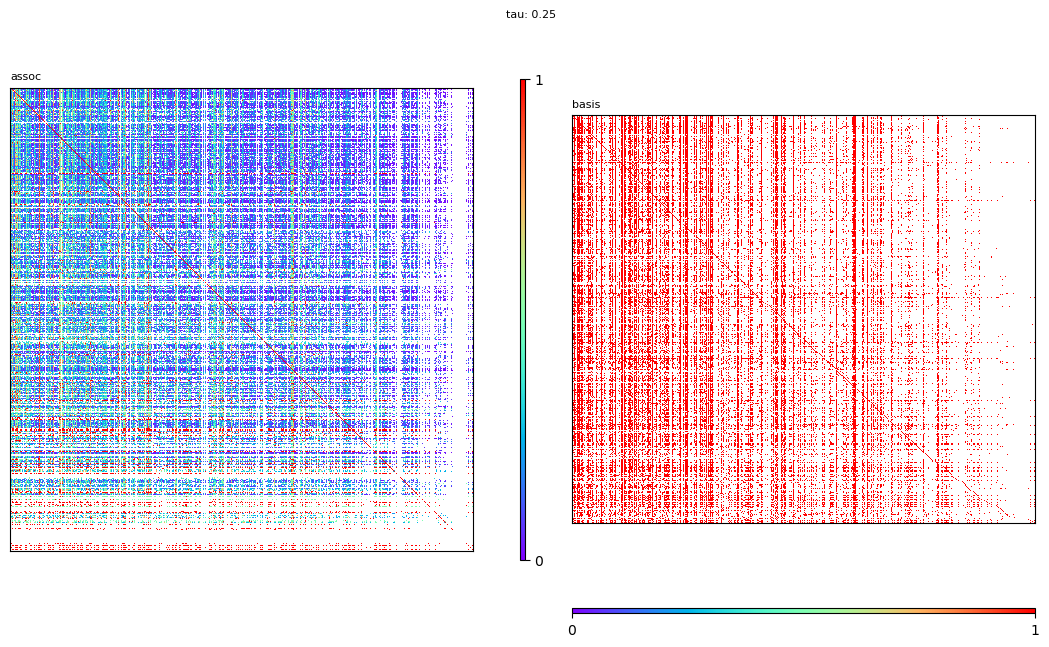

100%|██████████| 5/5 [00:11<00:00,  2.21s/it]                


[W] Stopped in advance: Reach requested factor
[I] time elapsed :  12s
[I] model saved as: 24-07-24_14-03-12_Asso.pickle


<Figure size 640x480 with 0 Axes>

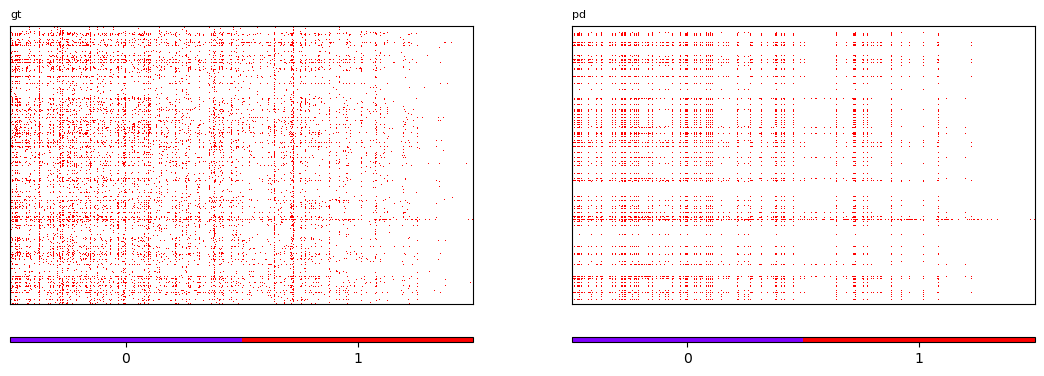

train                                                \
                             0                                                 
                time  k  score score_0.5 desc_len      shape    TP       TPR   
0  24/07/24 02:03:03  0  540.0     540.0   9791.0   [62, 55]  2245  0.208760   
1  24/07/24 02:03:06  1  657.0     657.0   9681.0  [14, 110]  2768  0.257393   
2  24/07/24 02:03:08  2  737.0     737.0   9578.0   [24, 33]  3159  0.293751   
3  24/07/24 02:03:10  3  799.5     799.5   9663.0   [1, 209]  3284  0.305375   
4  24/07/24 02:03:12  4  840.5     840.5   9682.0    [9, 92]  3529  0.328157   

                                                                           \
                                                                            
     FP       FPR    FN       FNR       ERR       ACC    Recall Precision   
0  1165  0.008366  8509  0.791240  0.064493  0.935507  0.208760  0.658358   
1  1454  0.010442  7986  0.742607  0.062933  0.937067  0.257393  0.655613   
2  1685  0.012101  7595  0.706249  0.061867  0.938133  0.293751  0.652147   
3  1685  0.012101  7470  0.694625  0.061033  0.938967  0.305375  0.660898   
4  1848  0.013271  7225  0.671843  0.060487  0.939513  0.328157  0.656314   

             
             
         F1  
0  0.317001  
1  0.369658  
2  0.405052  
3  0.417732  
4  0.437543

<Figure size 640x480 with 0 Axes>

In [7]:
from PyBMF.models import Asso

k = 5
tau = 0.25
w_fp = 0.5

model = Asso(k=k, tau=tau, w_fp=w_fp)
model.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=False)

In [12]:
# from PyBMF.utils import log2latex
# log2latex(model, 'updates')

In [11]:
# from PyBMF.utils import log2html
# log2html(model, 'updates')